In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#🛠️ Preparação dos Dados

# Extração do Arquivo Tratado

Carregue o arquivo CSV que contém os dados tratados anteriormente.
📂 Atenção: Utilize o mesmo arquivo que você limpou e organizou na parte 1 do desafio Telecom X. Ele deve conter somente as colunas relevantes, já com os dados corrigidos e padronizados.

In [2]:
dados_tratados = pd.read_csv('/content/dados_tratados_2.csv')
dados_tratados

,customerID,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streamingTV,streaming_movies,contract,paperless_billing,payment_method,contas_diarias,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [3]:
dados_tratados.columns

Index(['customerID', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streamingTV', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'contas_diarias',
       'charges_monthly', 'charges_total'],
      dtype='object')

Remoção de Colunas Irrelevantes

Elimine colunas que não trazem valor para a análise ou para os modelos preditivos, como identificadores únicos (por exemplo, o ID do cliente). Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

In [4]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   churn              7043 non-null   object 
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   object 
 5   dependents         7043 non-null   object 
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streamingTV        7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [5]:
#Verificar se há valores nulos
dados_tratados.isna().sum()

,0
customerID,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


In [6]:
dados_tratados.describe()

,senior_citizen,tenure,contas_diarias,charges_monthly,charges_total
count,7043.000000,7043.000000,7032.000000,7043.000000,7032.000000
mean,0.162147,32.371149,2.159879,64.761692,2283.300441
std,0.368612,24.559481,1.006217,30.090047,2266.771362
min,0.000000,0.000000,0.460000,18.250000,18.800000
25%,0.000000,9.000000,1.207500,35.500000,401.450000
50%,0.000000,29.000000,2.350000,70.350000,1397.475000
75%,0.000000,55.000000,3.010000,89.850000,3794.737500
max,1.000000,72.000000,4.050000,118.750000,8684.800000


In [7]:
dados_tratados.describe(include='O')

,customerID,churn,gender,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streamingTV,streaming_movies,contract,paperless_billing,payment_method
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [8]:
# Remoção de colunas irrelevantes

dados_tratados = dados_tratados.drop(['customerID'], axis=1)
dados_tratados

,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streamingTV,streaming_movies,contract,paperless_billing,payment_method,contas_diarias,charges_monthly,charges_total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [9]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   churn              7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streamingTV        7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

# Encoding

Transforme as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilize um método de codificação adequado, como o one-hot encoding.


In [10]:
# Identificando as variáveis categóricas
colunas_categoricas = [ 'churn', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
                       'internet_service', 'online_security', 'online_backup', 'device_protection',
                       'tech_support', 'streamingTV', 'streaming_movies', 'contract',
                       'paperless_billing', 'payment_method']

# Aplicando One-Hot Encoding nas variáveis categóricas
dados_tratados = pd.get_dummies(dados_tratados, columns=colunas_categoricas, drop_first=True)

# Verificando as primeiras linhas para garantir que a transformação foi realizada corretamente
dados_tratados.head()


,senior_citizen,tenure,contas_diarias,charges_monthly,charges_total,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,...,streamingTV_No internet service,streamingTV_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [11]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7043 non-null   int64  
 1   tenure                                  7043 non-null   int64  
 2   contas_diarias                          7032 non-null   float64
 3   charges_monthly                         7043 non-null   float64
 4   charges_total                           7032 non-null   float64
 5   churn_Yes                               7043 non-null   bool   
 6   gender_Male                             7043 non-null   bool   
 7   partner_Yes                             7043 non-null   bool   
 8   dependents_Yes                          7043 non-null   bool   
 9   phone_service_Yes                       7043 non-null   bool   
 10  multiple_lines_No phone service         7043 non-null   bool

In [12]:
#Verificar se existem dados nulos:
dados_tratados.isnull().sum()

,0
senior_citizen,0
tenure,0
contas_diarias,11
charges_monthly,0
charges_total,11
churn_Yes,0
gender_Male,0
partner_Yes,0
dependents_Yes,0
phone_service_Yes,0


In [13]:
# Verificar os valores nulos:
print(dados_tratados[['contas_diarias','charges_total']].isnull().sum())

contas_diarias    11
charges_total     11
dtype: int64


In [14]:
# removendo as linhas com valores nulos:
dados_tratados = dados_tratados.dropna(subset=['contas_diarias','charges_total'])
dados_tratados

,senior_citizen,tenure,contas_diarias,charges_monthly,charges_total,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,...,streamingTV_No internet service,streamingTV_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,False,False,False,True,False,True,False,False,False,True


# Normalização ou Padronização (se necessário)

Avalie a necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados.
Modelos baseados em distância, como KNN, SVM, Regressão Logística e Redes Neurais, requerem esse pré-processamento.
Já modelos baseados em árvore, como Decision Tree, Random Forest e XGBoost, não são sensíveis à escala dos dados.

In [15]:
dados_tratados.nunique()

,0
senior_citizen,2
tenure,72
contas_diarias,354
charges_monthly,1584
charges_total,6530
churn_Yes,2
gender_Male,2
partner_Yes,2
dependents_Yes,2
phone_service_Yes,2


In [16]:
# Separar variáveis numéricas e categóricas
colunas_numericas = dados_tratados.select_dtypes(include=['int64', 'float64']).columns.tolist()
colunas_categoricas = dados_tratados.select_dtypes(include=['object', 'bool']).columns.tolist()

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [18]:
# Inicializando o StandardScaler. StandardScaler(): Normaliza os dados para que cada variável tenha média 0 e desvio padrão 1.
scaler = StandardScaler()

# Aplicando a normalização nas variáveis numéricas
dados_tratados[colunas_numericas] = scaler.fit_transform(dados_tratados[colunas_numericas])

# Verificando as primeiras linhas para garantir que a normalização foi aplicada
dados_tratados.head()

,senior_citizen,tenure,contas_diarias,charges_monthly,charges_total,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,...,streamingTV_No internet service,streamingTV_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,-0.440327,-0.954296,0.039876,0.026652,-0.745607,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,-0.440327,-0.954296,-0.148964,-0.162819,-0.768063,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,-0.440327,-1.158016,0.179021,0.302548,-0.883456,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,2.271039,-0.791321,1.003951,1.103642,-0.461240,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,2.271039,-1.198760,0.805173,0.634952,-0.889390,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [19]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7032 non-null   float64
 1   tenure                                  7032 non-null   float64
 2   contas_diarias                          7032 non-null   float64
 3   charges_monthly                         7032 non-null   float64
 4   charges_total                           7032 non-null   float64
 5   churn_Yes                               7032 non-null   bool   
 6   gender_Male                             7032 non-null   bool   
 7   partner_Yes                             7032 non-null   bool   
 8   dependents_Yes                          7032 non-null   bool   
 9   phone_service_Yes                       7032 non-null   bool   
 10  multiple_lines_No phone service         7032 non-null   bool   
 

# Verificação da Proporção de Evasão

Calcule a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

In [20]:
# Calcular em percentual o Churn
dados_tratados['churn_Yes'].value_counts(normalize=True) * 100


,proportion
churn_Yes,
False,73.421502
True,26.578498


## Balanceamento de Classes (opcional )

Caso queira aprofundar a análise, aplique técnicas de balanceamento como undersampling ou oversampling. Em situações de forte desbalanceamento, ferramentas como o SMOTE podem ser úteis para gerar exemplos sintéticos da classe minoritária.

In [21]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

# Definindo variáveis independentes (X) e dependentes (y)
X = dados_tratados.drop('churn_Yes', axis=1)
y = dados_tratados['churn_Yes']

# Aplicando o SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verificando a distribuição das classes após o balanceamento
print("Distribuição original das classes:", Counter(y))
print("Distribuição após o balanceamento:", Counter(y_res))


Distribuição original das classes: Counter({False: 5163, True: 1869})
Distribuição após o balanceamento: Counter({False: 5163, True: 5163})


# 🎯 Correlação e Seleção de Variáveis

# Análise de Correlação

Visualize a matriz de correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

Análises Direcionadas

Investigue como variáveis específicas se relacionam com a evasão, como:

Tempo de contrato × Evasão

Total gasto × Evasão

Utilize gráficos como boxplots ou dispersão (scatter plots) para visualizar padrões e possíveis tendências.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a Matriz de Correlação entre as variáveis numéricas.

correlacao = dados_tratados.corr()
correlacao

,senior_citizen,tenure,contas_diarias,charges_monthly,charges_total,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,...,streamingTV_No internet service,streamingTV_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
senior_citizen,1.000000,0.015683,0.217622,0.219874,0.102411,0.150541,-0.001819,0.016957,-0.210550,0.008392,...,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246210,0.246862,0.825880,-0.354049,0.005285,0.381912,0.163386,0.007877,...,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
contas_diarias,0.217622,0.246210,1.000000,0.996227,0.650921,0.192030,-0.014477,0.097159,-0.112514,0.247900,...,-0.759737,0.626474,-0.759737,0.626058,0.005252,-0.072454,0.349467,0.029974,0.270270,-0.374906
charges_monthly,0.219874,0.246862,0.996227,1.000000,0.651065,0.192858,-0.013779,0.097825,-0.112343,0.248033,...,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
charges_total,0.102411,0.825880,0.650921,0.651065,1.000000,-0.199484,0.000048,0.319072,0.064653,0.113008,...,-0.374878,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
churn_Yes,0.150541,-0.354049,0.192030,0.192858,-0.199484,1.000000,-0.008545,-0.149982,-0.163128,0.011691,...,-0.227578,0.063254,-0.227578,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
gender_Male,-0.001819,0.005285,-0.014477,-0.013779,0.000048,-0.008545,1.000000,-0.001379,0.010349,-0.007515,...,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
partner_Yes,0.016957,0.381912,0.097159,0.097825,0.319072,-0.149982,-0.001379,1.000000,0.452269,0.018397,...,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
dependents_Yes,-0.210550,0.163386,-0.112514,-0.112343,0.064653,-0.163128,0.010349,0.452269,1.000000,-0.001078,...,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
phone_service_Yes,0.008392,0.007877,0.247900,0.248033,0.113008,0.011691,-0.007515,0.018397,-0.001078,1.000000,...,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463


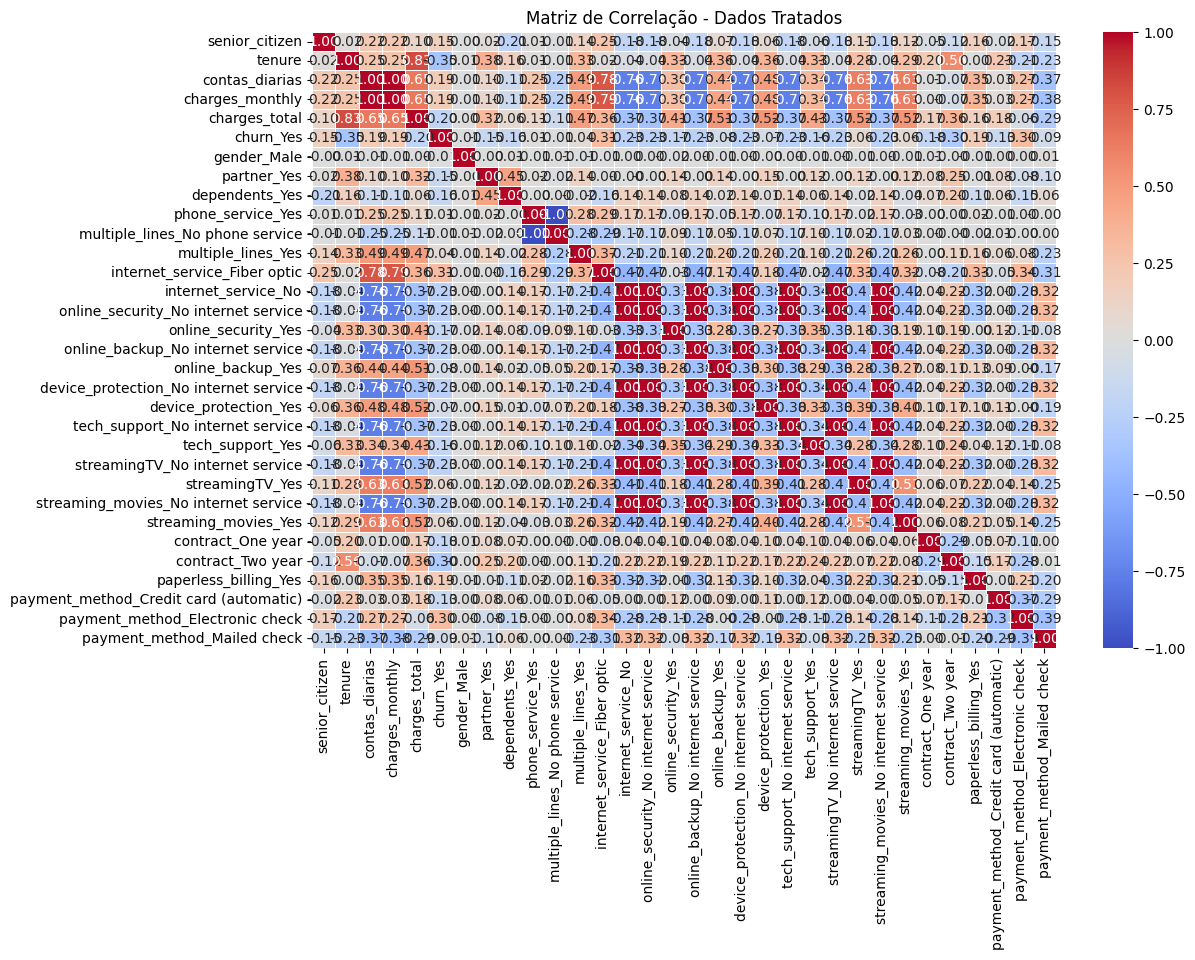

churn_Yes                                 1.000000
internet_service_Fiber optic              0.307463
payment_method_Electronic check           0.301455
charges_monthly                           0.192858
contas_diarias                            0.192030
paperless_billing_Yes                     0.191454
senior_citizen                            0.150541
streamingTV_Yes                           0.063254
streaming_movies_Yes                      0.060860
multiple_lines_Yes                        0.040033
phone_service_Yes                         0.011691
gender_Male                              -0.008545
multiple_lines_No phone service          -0.011691
device_protection_Yes                    -0.066193
online_backup_Yes                        -0.082307
payment_method_Mailed check              -0.090773
payment_method_Credit card (automatic)   -0.134687
partner_Yes                              -0.149982
dependents_Yes                           -0.163128
tech_support_Yes               

In [23]:
# Visualizar a matriz usando um heatmap.

plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Exibir o título
plt.title("Matriz de Correlação - Dados Tratados")
plt.show()

# Exibir a correlação de cada variável com 'churn_Yes'
print(correlacao['churn_Yes'].sort_values(ascending=False))

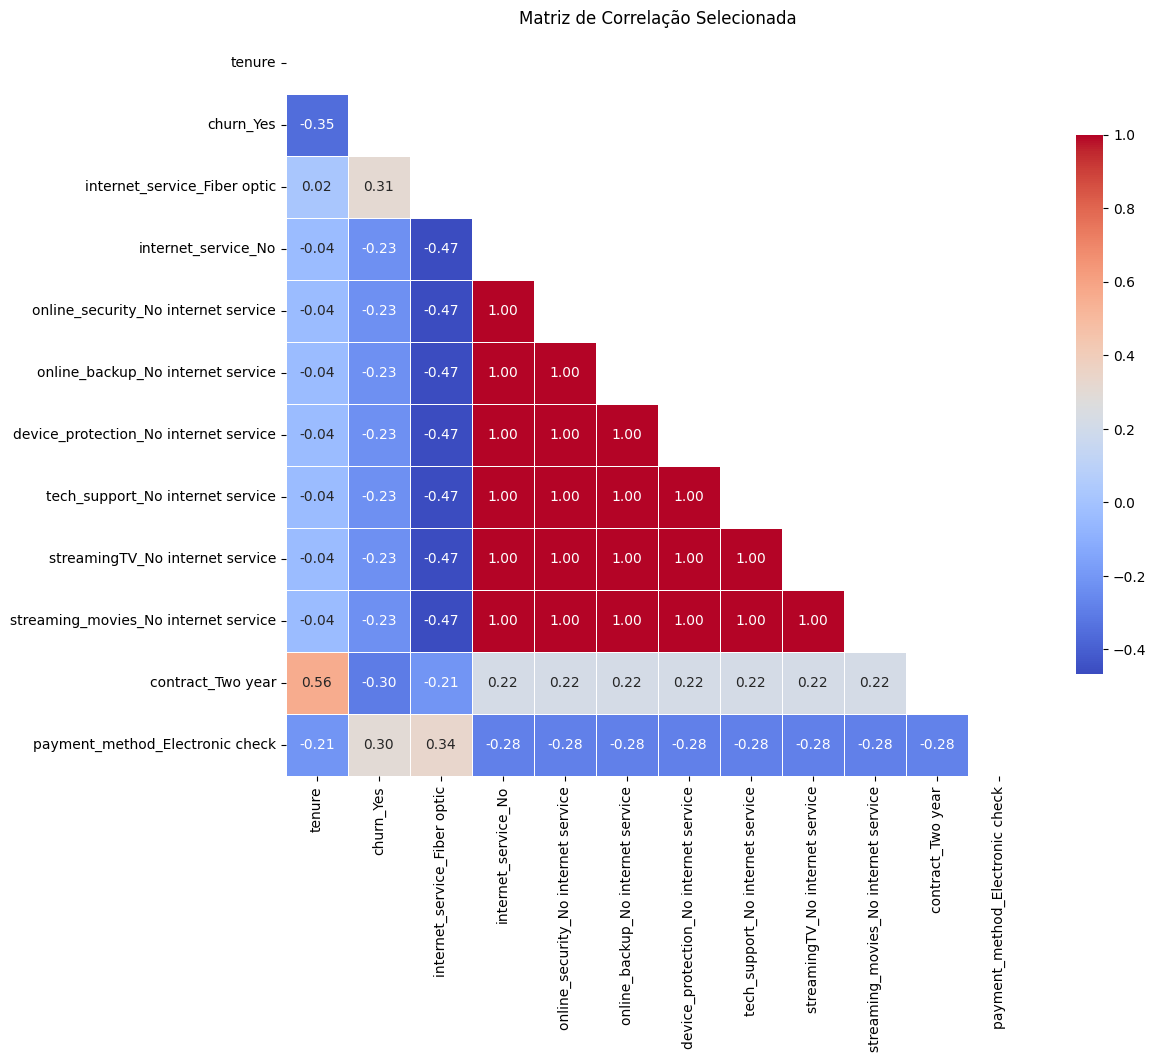

In [24]:
import numpy as np

#Definir a variável alvo:
variável_alvo = 'churn_Yes'

#Definir o limiar mínimo de correlaçao absoluta para seleção
limiar_correlacao = 0.2

#Filtrar variáveis que tenham correlação absoluta>= limiar com a variável alvo com a criação de uma lista com as variáveis relevantes
variaveis_selecionadas = correlacao.index[abs(correlacao[variável_alvo]) >= limiar_correlacao].tolist()


#Garantir que a variável alvo está na lista, se não estiver, adicionaremos
if variável_alvo not in variaveis_selecionadas:
  variaveis_selecionadas.append(variável_alvo)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_selecionadas = correlacao.loc[variaveis_selecionadas, variaveis_selecionadas]

#Gerar uma máscara para esconder o triângulo superior da matriz, incluindo diagonal.
mascara = np.triu(np.ones_like(corr_selecionadas, dtype=bool))

#Plotar o headmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(12, 10))
sns.heatmap(corr_selecionadas, mask=mascara, annot=True, fmt='.2f', cmap='coolwarm',square=True, linewidths=.5, cbar_kws={'shrink':0.7})
plt.title('Matriz de Correlação Selecionada')
plt.show()




# 🤖 Modelagem Preditiva

## Separação de Dados

Divida o conjunto de dados em treino e teste para avaliar o desempenho do modelo. Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.

Dividindo o Conjunto de Dados em Treino e Teste

In [25]:
from sklearn.model_selection import train_test_split

# Dividindo o conjunto de dados em treino e teste (80% para treino, 20% para teste)
X = dados_tratados.drop('churn_Yes', axis=1)
y = dados_tratados['churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificando o tamanho dos conjuntos de treino e teste
print(f"Tamanho do treino: {X_train.shape}, Tamanho do teste: {X_test.shape}")


Tamanho do treino: (5625, 31), Tamanho do teste: (1407, 31)


## Criação de Modelos

Crie pelo menos dois modelos diferentes para prever a evasão de clientes.

Um modelo pode exigir normalização, como Regressão Logística ou KNN.

O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

💡 A escolha de aplicar ou não a normalização depende dos modelos selecionados. Ambos os modelos podem ser criados sem normalização, mas a combinação de modelos com e sem normalização também é uma opção.

Justifique a escolha de cada modelo e, se optar por normalizar os dados, explique a necessidade dessa etapa

Criando e Treinando os Modelos
Regressão Logística

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Criando o modelo de Regressão Logística com normalização
logreg_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Treinando o modelo
logreg_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Previsões no conjunto de teste
y_pred_logreg = logreg_model.predict(X_test)

# Calculando as métricas
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Exibindo as métricas para Regressão Logística
print("Regressão Logística:")
print(f"Acurácia: {accuracy_logreg:.2f}")
print(f"Precisão: {precision_logreg:.2f}")
print(f"Recall: {recall_logreg:.2f}")
print(f"F1-score: {f1_logreg:.2f}")
print("Matriz de Confusão:")
print(conf_matrix_logreg)


Regressão Logística:
Acurácia: 0.80
Precisão: 0.65
Recall: 0.53
F1-score: 0.58
Matriz de Confusão:
[[927 106]
 [176 198]]


Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
# Previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Calculando as métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Exibindo as métricas para Random Forest
print("\nRandom Forest:")
print(f"Acurácia: {accuracy_rf:.2f}")
print(f"Precisão: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")
print("Matriz de Confusão:")
print(conf_matrix_rf)



Random Forest:
Acurácia: 0.79
Precisão: 0.64
Recall: 0.48
F1-score: 0.55
Matriz de Confusão:
[[931 102]
 [193 181]]


KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [32]:
# Criando o modelo KNN com normalização
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

# Treinando o modelo
knn_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_knn = knn_model.predict(X_test)

# Calculando as métricas
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Exibindo as métricas para KNN
print("\nK-Nearest Neighbors (KNN):")
print(f"Acurácia: {accuracy_knn:.2f}")
print(f"Precisão: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-score: {f1_knn:.2f}")
print("Matriz de Confusão:")
print(conf_matrix_knn)



K-Nearest Neighbors (KNN):
Acurácia: 0.76
Precisão: 0.56
Recall: 0.53
F1-score: 0.54
Matriz de Confusão:
[[878 155]
 [177 197]]


In [33]:
from sklearn.model_selection import GridSearchCV

# Definindo o intervalo de valores para 'n_neighbors'
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15]  # Testando diferentes valores de k
}

# Criando o modelo KNN com normalização
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Realizando a busca em grade (GridSearchCV)
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Treinando o modelo com a busca em grade
grid_search.fit(X_train, y_train)

# Exibindo o melhor parâmetro de 'k' encontrado
print(f"Melhor valor de k encontrado: {grid_search.best_params_['kneighborsclassifier__n_neighbors']}")

# Previsões com o melhor modelo encontrado
y_pred_knn_best = grid_search.predict(X_test)

# Calculando as métricas para o modelo otimizado
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
precision_knn_best = precision_score(y_test, y_pred_knn_best)
recall_knn_best = recall_score(y_test, y_pred_knn_best)
f1_knn_best = f1_score(y_test, y_pred_knn_best)
conf_matrix_knn_best = confusion_matrix(y_test, y_pred_knn_best)

# Exibindo as métricas para o modelo otimizado
print("\nK-Nearest Neighbors (KNN) - Melhor Modelo após GridSearchCV:")
print(f"Acurácia: {accuracy_knn_best:.2f}")
print(f"Precisão: {precision_knn_best:.2f}")
print(f"Recall: {recall_knn_best:.2f}")
print(f"F1-score: {f1_knn_best:.2f}")
print("Matriz de Confusão:")
print(conf_matrix_knn_best)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Melhor valor de k encontrado: 15

K-Nearest Neighbors (KNN) - Melhor Modelo após GridSearchCV:
Acurácia: 0.77
Precisão: 0.57
Recall: 0.52
F1-score: 0.55
Matriz de Confusão:
[[886 147]
 [178 196]]


## Avaliação dos Modelos

Avalie cada modelo utilizando as seguintes métricas:

Acurácia

Precisão

Recall

F1-score

Matriz de confusão

Em seguida, faça uma análise crítica e compare os modelos:

Qual modelo teve o melhor desempenho?

Algum modelo apresentou overfitting ou underfitting? Se sim, considere as possíveis causas e ajustes:

Overfitting: Quando o modelo aprende demais sobre os dados de treino, perdendo a capacidade de generalizar para novos dados. Considere reduzir a complexidade do modelo ou aumentar os dados de treino.

Underfitting: Quando o modelo não captura bem as tendências dos dados, indicando que está muito simples. Tente aumentar a complexidade do modelo ou ajustar seus parâmetros.

# 📋  Interpretação e Conclusões

Análise de Importância das Variáveis

Após escolher os modelos, realize a análise das variáveis mais relevantes para a previsão de evasão:

Regressão Logística:  investigue os coeficientes das variáveis, que mostram sua contribuição para a previsão de evasão.

KNN (K-Nearest Neighbors): Observe como os vizinhos mais próximos influenciam a decisão de classificação. As variáveis mais impactantes podem ser aquelas que mais contribuem para a proximidade entre os pontos de dados.

Random Forest: Utilize a importância das variáveis fornecida pelo modelo. O Random Forest calcula a importância com base em como cada variável contribui para a redução da impureza durante as divisões das árvores.

SVM (Support Vector Machine): No SVM, as variáveis mais relevantes são aquelas que influenciam a fronteira de decisão entre as classes. Você pode analisar os coeficientes dos vetores de suporte para entender quais variáveis têm maior impacto.

Outros Modelos: Dependendo do modelo escolhido, considere a análise de métricas específicas para entender a relevância das variáveis. Por exemplo, coeficientes em modelos lineares, pesos em redes neurais, ou importância relativa em boosting (como XGBoost).

# Análise de Importância das Variáveis

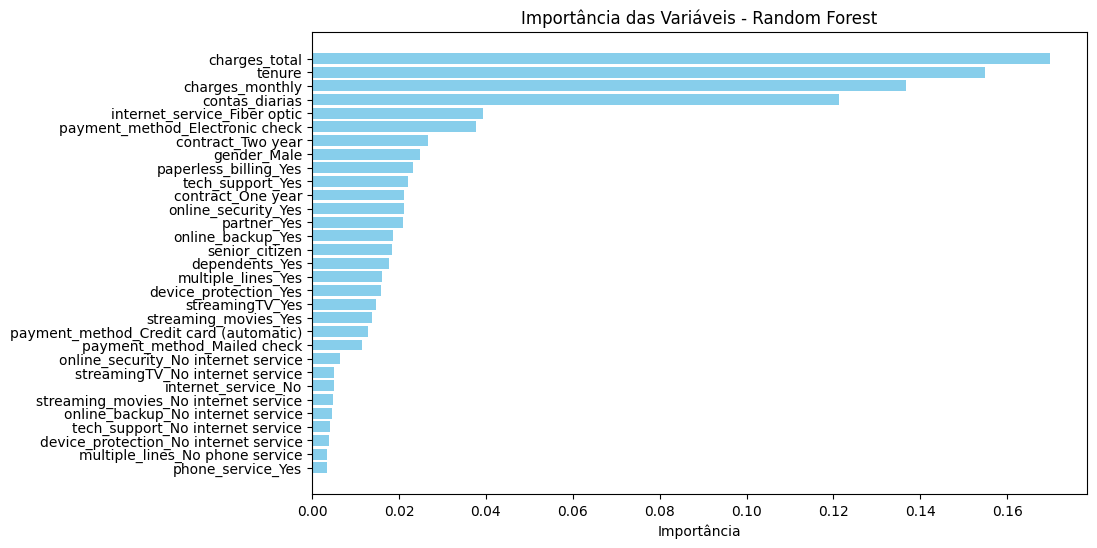

                                  Variável  Importância
4                            charges_total     0.169909
1                                   tenure     0.154938
3                          charges_monthly     0.136654
2                           contas_diarias     0.121252
11            internet_service_Fiber optic     0.039265
29         payment_method_Electronic check     0.037739
26                       contract_Two year     0.026748
5                              gender_Male     0.024725
27                   paperless_billing_Yes     0.023306
20                        tech_support_Yes     0.022191
25                       contract_One year     0.021195
14                     online_security_Yes     0.021103
6                              partner_Yes     0.020913
16                       online_backup_Yes     0.018630
0                           senior_citizen     0.018333
7                           dependents_Yes     0.017713
10                      multiple_lines_Yes     0

In [34]:
#Importância das Variáveis com Random Forest

# Treinando o modelo Random Forest para calcular a importância das variáveis
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtendo a importância das variáveis
importancia_variaveis = rf_model.feature_importances_

# Criando um DataFrame para visualizar a importância das variáveis
importancia_df = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': importancia_variaveis
})

# Ordenando as variáveis pela importância
importancia_df = importancia_df.sort_values(by='Importância', ascending=False)

# Visualizando a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Variável'], importancia_df['Importância'], color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Random Forest')
plt.gca().invert_yaxis()  # Invertendo o eixo para exibir as variáveis mais importantes no topo
plt.show()

# Exibindo as variáveis mais importantes
print(importancia_df)


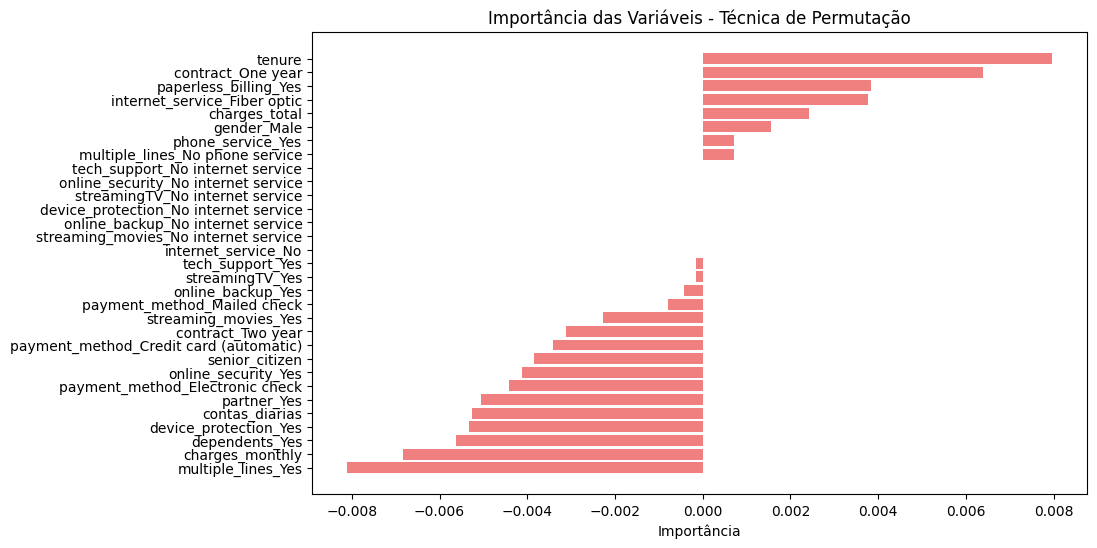

                                  Variável  Importância
1                                   tenure     0.007960
25                       contract_One year     0.006397
27                   paperless_billing_Yes     0.003838
11            internet_service_Fiber optic     0.003767
4                            charges_total     0.002416
5                              gender_Male     0.001564
8                        phone_service_Yes     0.000711
9          multiple_lines_No phone service     0.000711
19        tech_support_No internet service     0.000000
13     online_security_No internet service     0.000000
21         streamingTV_No internet service     0.000000
17   device_protection_No internet service     0.000000
15       online_backup_No internet service     0.000000
23    streaming_movies_No internet service     0.000000
12                     internet_service_No     0.000000
20                        tech_support_Yes    -0.000142
22                         streamingTV_Yes    -0

In [36]:
#Importância das Variáveis com Técnica de Permutação
from sklearn.inspection import permutation_importance

# Calculando a importância das variáveis por permutação (com o melhor modelo KNN após GridSearchCV)
result = permutation_importance(grid_search.best_estimator_, X_test, y_test, n_repeats=10, random_state=42)

# Criando um DataFrame para visualizar a importância das variáveis
perm_importance_df = pd.DataFrame({
    'Variável': X_test.columns,
    'Importância': result.importances_mean
})

# Ordenando as variáveis pela importância
perm_importance_df = perm_importance_df.sort_values(by='Importância', ascending=False)

# Visualizando a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Variável'], perm_importance_df['Importância'], color='lightcoral')
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Técnica de Permutação')
plt.gca().invert_yaxis()  # Invertendo o eixo para exibir as variáveis mais importantes no topo
plt.show()

# Exibindo as variáveis mais importantes
print(perm_importance_df)



## Após escolher os modelos, realize a análise das variáveis mais relevantes para a previsão de evasão:

Regressão Logística: investigue os coeficientes das variáveis, que mostram sua contribuição para a previsão de evasão.



                                  Variável  Coeficiente
11            internet_service_Fiber optic     0.865254
4                            charges_total     0.606249
27                   paperless_billing_Yes     0.370333
29         payment_method_Electronic check     0.352356
22                         streamingTV_Yes     0.319810
10                      multiple_lines_Yes     0.235687
2                           contas_diarias     0.207029
24                    streaming_movies_Yes     0.176641
0                           senior_citizen     0.094628
18                   device_protection_Yes     0.010119
30             payment_method_Mailed check    -0.005684
9          multiple_lines_No phone service    -0.050471
5                              gender_Male    -0.067614
7                           dependents_Yes    -0.075295
6                              partner_Yes    -0.093018
28  payment_method_Credit card (automatic)    -0.098647
16                       online_backup_Yes    -0

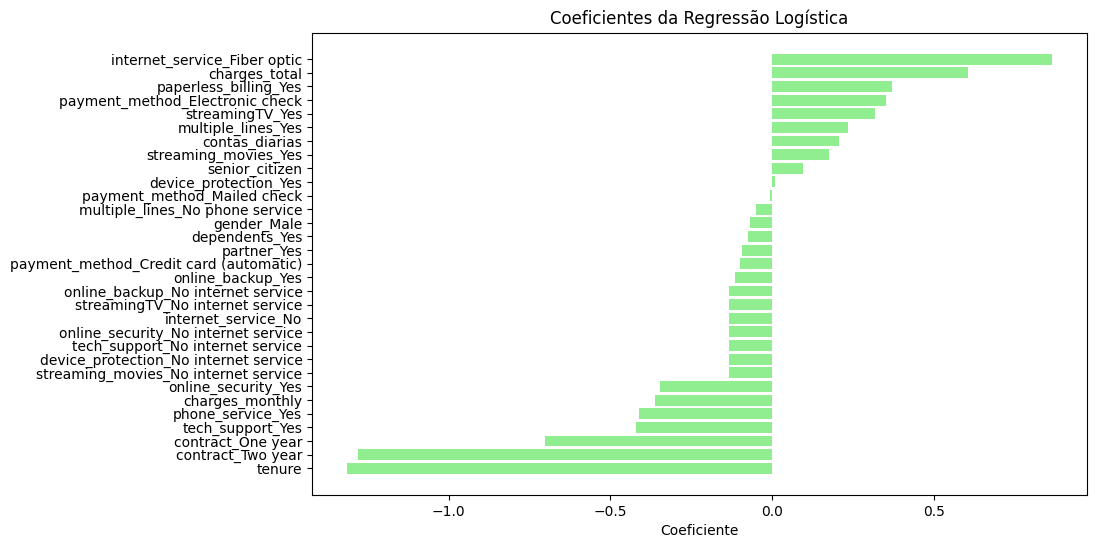

In [ ]:
# Criando e treinando o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression

# Treinando o modelo
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Coletando os coeficientes do modelo
coeficientes = logreg_model.coef_[0]

# Criando um DataFrame para exibir as variáveis e seus coeficientes
coef_df = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': coeficientes
})

# Ordenando os coeficientes
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Exibindo os coeficientes
print(coef_df)

# Visualizando os coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Variável'], coef_df['Coeficiente'], color='lightgreen')
plt.xlabel('Coeficiente')
plt.title('Coeficientes da Regressão Logística')
plt.gca().invert_yaxis()  # Invertendo para que a variável com maior coeficiente apareça no topo
plt.show()


# Variáveis com Coeficiente Positivo (Aumentam a Probabilidade de Churn):

internet_service_Fiber optic (Coeficiente: 0.865):

Clientes com internet via fibra ótica têm maior probabilidade de cancelar o serviço. Isso pode estar relacionado ao fato de que, geralmente, o serviço de fibra ótica tem um custo mais alto, o que pode gerar insatisfação ou dificuldades financeiras.

charges_total (Coeficiente: 0.606):

Valores totais mais altos aumentam a chance de evasão. A cobrança total mais alta pode indicar que os clientes que pagam mais por seus serviços estão mais propensos a cancelá-los, possivelmente devido ao preço elevado.

paperless_billing_Yes (Coeficiente: 0.370):

Clientes que optam pela fatura sem papel têm uma chance maior de cancelamento. Isso pode indicar uma preferência por métodos mais digitais ou modernizados, o que pode ser um reflexo de um público mais jovem, mais disposto a cancelar.

payment_method_Electronic check (Coeficiente: 0.352):

Clientes que pagam via cheque eletrônico têm maior chance de evasão. Isso pode refletir um comportamento de clientes mais propensos a problemas de pagamento ou a preferência por métodos de pagamento alternativos.

streamingTV_Yes (Coeficiente: 0.319):

Clientes que utilizam o streaming de TV têm uma chance um pouco maior de cancelamento. Isso pode estar relacionado a um comportamento em que os clientes que utilizam serviços de streaming buscam alternativas mais baratas ou concorrentes.


# Variáveis com Coeficiente Negativo (Reduzem a Probabilidade de Churn):

contract_One year (Coeficiente: -0.701):

Clientes com contrato de 1 ano têm uma probabilidade significativamente menor de cancelar o serviço, indicando que contratos mais longos aumentam a fidelidade dos clientes.

contract_Two year (Coeficiente: -1.279):

A probabilidade de evasão é ainda menor para clientes com contrato de 2 anos, sendo essa a variável com o maior coeficiente negativo. Isso reforça a ideia de que contratos de longo prazo reduzem a chance de cancelamento, já que os clientes tendem a se sentir mais comprometidos com o serviço.

tenure (Coeficiente: -1.313):

Tenure (tempo de relacionamento com o cliente) tem um forte coeficiente negativo. Ou seja, clientes que permanecem por mais tempo têm muito menos chance de cancelar o serviço, o que é esperado, já que esses clientes provavelmente estão mais satisfeitos ou mais investidos na relação com a empresa.

charges_monthly (Coeficiente: -0.362):

A cobrança mensal tem um coeficiente negativo, indicando que, quanto menor a cobrança mensal, maior a probabilidade de retenção. Isso sugere que clientes com planos mais baratos tendem a ser mais leais.

phone_service_Yes (Coeficiente: -0.409):

Clientes que utilizam o serviço de telefone têm menos chance de cancelar, possivelmente porque esses pacotes tendem a ser mais baratos ou mais bem adaptados às necessidades dos clientes.


# Conclusão Geral:
Variáveis que aumentam a chance de evasão:

A presença de serviços adicionais como streaming de TV, pagamento por cheque eletrônico, e cobranças mais altas (como em charges_total) estão associadas com a maior probabilidade de cancelamento.

Variáveis que ajudam a reduzir a chance de evasão:

Contratos de longo prazo (1 ou 2 anos), tempo de permanência (tenure) e a presença de serviços como suporte técnico e serviço de telefone são os principais fatores que reduzem a probabilidade de evasão.

# Sugestões:

Fidelizar clientes: Estratégias que incentivem contratos mais longos (1-2 anos) podem ser eficazes para reduzir a evasão.

Reduzir custos: Oferecer pacotes mais acessíveis pode ajudar a manter os clientes mais satisfeitos e reduzir a evasão.

Melhorar a experiência do cliente: Investir em suporte técnico e serviços essenciais pode aumentar a lealdade e retenção.

## KNN (K-Nearest Neighbors): Observe como os vizinhos mais próximos influenciam a decisão de classificação. As variáveis mais impactantes podem ser aquelas que mais contribuem para a proximidade entre os pontos de dados.



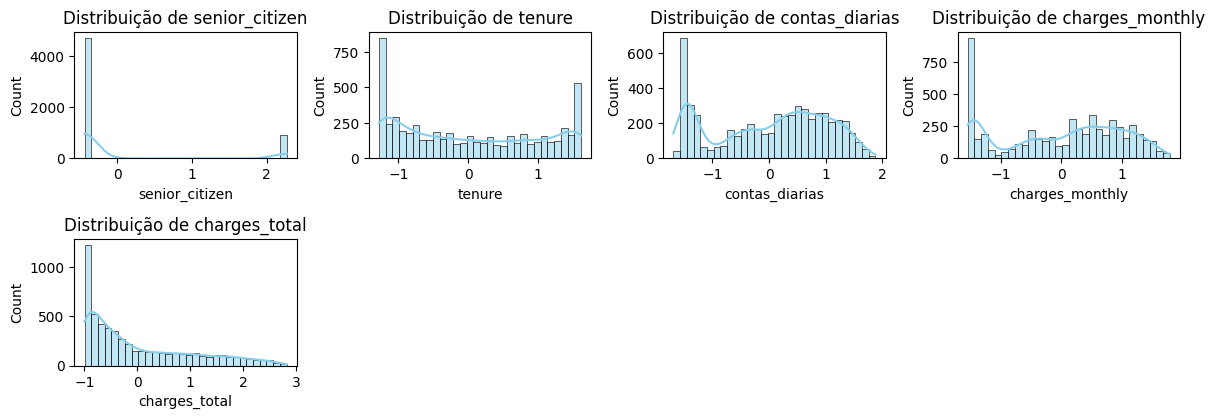

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizando a distribuição das variáveis numéricas
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Plotando a distribuição das variáveis numéricas
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(X_train[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()


# Variáveis com Maior Importância Positiva:

tenure (Importância: 0.007960):

O tempo de permanência é a variável mais importante, com a maior contribuição para a previsão de evasão. Isso indica que clientes com mais tempo de contrato tendem a ser menos propensos a cancelar, o que é uma característica forte para a decisão do modelo.

contract_One year (Importância: 0.006397):

Clientes com contrato de 1 ano têm uma probabilidade significativamente menor de cancelar. A importância dessa variável também é alta, o que reforça a ideia de que contratos mais longos são bons preditores para a retenção de clientes.

paperless_billing_Yes (Importância: 0.003838):

Optar por faturas sem papel tem uma contribuição positiva, embora não tão forte quanto o tempo de contrato e o tipo de contrato. Isso sugere que clientes que preferem faturas digitais podem estar mais envolvidos com os serviços e menos propensos a cancelar.

internet_service_Fiber optic (Importância: 0.003767):

A presença de internet via fibra ótica é uma variável relevante, indicando que a oferta de internet de alta qualidade (como fibra ótica) pode ser um fator importante para a retenção.

charges_total (Importância: 0.002416):

Cobranças totais mais altas têm uma influência moderada. Isso indica que clientes com contas maiores podem estar mais inclinados a cancelar, possivelmente devido ao custo elevado.

# Variáveis com Baixa ou Nenhuma Importância:

tech_support_No internet service e outras variáveis como streamingTV_No internet service, device_protection_No internet service, etc., têm importância zero, indicando que essas variáveis não estão contribuindo para o modelo KNN. Isso faz sentido, já que clientes sem esses serviços provavelmente não são uma variável discriminante para o churn (evasão), dado que não há serviço para avaliar nesses casos.

# Variáveis com Importância Negativa:

charges_monthly (Importância: -0.006823):

Uma importância negativa sugere que a variável cobrança mensal contribui para reduzir a acurácia do modelo quando é embaralhada. Isso pode indicar que essa variável não é um bom preditor de evasão no KNN, ou que ela não varia de maneira significativa entre os clientes que cancelam e os que não cancelam.

multiple_lines_Yes (Importância: -0.008102):

A presença de múltiplas linhas (ou pacotes) também tem uma importância negativa. Isso pode indicar que a distribuição dos pacotes múltiplos entre os clientes que cancelam e os que não cancelam não está ajudando a distinguir os dois grupos.

# Variáveis com Importância Intermediária:

payment_method_Electronic check (Importância: -0.004407) e payment_method_Credit card (automatic) (Importância: -0.003412) têm importância negativa, o que sugere que a forma de pagamento, especialmente os pagamentos automáticos e cheques eletrônicos, podem não ser bons preditores no modelo KNN. Isso pode ser porque esses métodos de pagamento não são suficientemente distintos entre os clientes que cancelam e os que não cancelam.

# Conclusões:

Variáveis Mais Impactantes para KNN:

tenure (tempo de contrato) e contract_One year são as variáveis mais importantes para prever o churn. Clientes com mais tempo de contrato ou contratos mais longos têm menor chance de evasão, o que é um forte indicador de lealdade.

paperless_billing_Yes e internet_service_Fiber optic também são importantes, indicando que clientes com serviços de maior qualidade (fibra ótica) e que optam por faturas digitais podem ser mais leais.

# Variáveis Menos Relevantes:

Variáveis relacionadas a "sem serviço", como tech_support_No internet service e streamingTV_No internet service, não parecem ser importantes para o modelo KNN, já que esses valores não ajudam a diferenciar os clientes que cancelam de quem não cancela.

# Variáveis com Menor Contribuição:

charges_monthly e multiple_lines_Yes têm importância negativa. Isso pode indicar que essas variáveis não são boas para prever a evasão ou que há pouca variação entre os clientes que cancelam e os que não cancelam.

## Random Forest: Utilize a importância das variáveis fornecida pelo modelo. O Random Forest calcula a importância com base em como cada variável contribui para a redução da impureza durante as divisões das árvores.



# Variáveis mais Importantes para Prever Evasão:

charges_total (Importância: 0.169909):

Cobranças totais têm a maior importância. Isso sugere que clientes com valores mais altos de cobrança têm maior propensão a cancelar os serviços. Esta variável tem forte influência na decisão de classificação.

tenure (Importância: 0.154938):

O tempo de contrato é outra variável muito importante. Quanto maior o tempo de permanência de um cliente, menor a chance de cancelamento. Isso confirma que clientes mais leais (ou com mais tempo de contrato) têm menos probabilidade de cancelar.

charges_monthly (Importância: 0.136654):

A cobrança mensal também é uma variável significativa. Clientes com cobranças mensais altas podem estar mais inclinados a cancelar, especialmente se o valor não justificar o serviço prestado.

contas_diarias (Importância: 0.121252):

Essa variável também tem uma contribuição relevante para a previsão do churn. Clientes com mais interações diárias ou atividades no sistema podem ser mais propensos a cancelar, caso haja algum problema ou insatisfação com o serviço.

internet_service_Fiber optic (Importância: 0.039265):

O tipo de serviço de internet (fibra ótica) tem uma influência considerável, sugerindo que clientes com internet de alta qualidade (fibra ótica) têm menor chance de cancelar.

# Variáveis com Importância Moderada:

payment_method_Electronic check (Importância: 0.037739):

O método de pagamento eletrônico tem uma influência considerável. Isso pode indicar que clientes que optam por formas de pagamento automáticas podem ser mais leais ou menos propensos a cancelar.

contract_Two year (Importância: 0.026748):

Contratos de 2 anos têm uma relevância moderada, indicando que clientes com contratos mais longos tendem a permanecer por mais tempo.

gender_Male (Importância: 0.024725):

O gênero masculino tem uma contribuição, mas com importância mais baixa. Pode haver uma tendência que homens são um pouco mais ou menos propensos a cancelar, dependendo de outros fatores.

paperless_billing_Yes (Importância: 0.023306):

A opção por faturas sem papel também tem impacto, embora com importância relativamente baixa. A escolha por faturas digitais pode ser associada a clientes mais tecnológicos, que possivelmente são mais leais.

contract_One year (Importância: 0.021195):

Contratos de 1 ano são mais fracos preditores comparados a contratos de 2 anos, mas ainda têm um impacto moderado, indicando que clientes com contratos anuais podem ser mais propensos a cancelamento.

# Variáveis com Menor Importância:

phone_service_Yes (Importância: 0.003375):

Ter serviço de telefone não tem grande impacto na previsão de evasão. Isso pode sugerir que a presença do serviço de telefone não é um bom indicativo de cancelamento, ou que é menos relevante em comparação com outras variáveis.

multiple_lines_No phone service (Importância: 0.003469):

A variável relacionada a "sem serviço de telefone" também tem uma importância muito baixa. Pode ser que o serviço de telefone não seja o principal fator determinante para o cancelamento de clientes.

device_protection_No internet service (Importância: 0.003965):

A ausência de proteção de dispositivo sem serviço de internet tem um impacto muito pequeno. Isso pode ser porque clientes sem serviço de internet têm menos influência no churn.

streamingTV_No internet service (Importância: 0.005096):

A ausência de serviço de streaming de TV (sem serviço de internet) também tem um impacto insignificante, pois clientes sem serviço provavelmente não são indicativos significativos para a evasão.

# Conclusões:

# Principais Variáveis Preditivas para o Churn (Evasão):

charges_total e tenure são, sem dúvida, as variáveis mais impactantes, confirmando que clientes com maiores cobranças totais e clientes com mais tempo de permanência são os melhores indicativos de evasão. Esses resultados fazem sentido, pois clientes com contas mais altas ou que já estão há mais tempo no serviço podem se sentir insatisfeitos ou sobrecarregados, o que os leva a cancelar.

# Variáveis Moderadas:

charges_monthly, contas_diarias, e payment_method_Electronic check são moderadamente importantes, o que sugere que os clientes com interações frequentes, ou que pagam de forma mais automática, têm comportamentos que podem ser mais propensos ao churn.

# Menor Impacto:

Variáveis como phone_service_Yes, multiple_lines_No phone service, e device_protection_No internet service têm um impacto muito pequeno. Isso indica que a presença de serviços adicionais ou a falta deles, como telefonia ou proteção de dispositivo, não tem uma relação forte com a evasão.

# Recomendações:

Focar nas variáveis charges_total e tenure ao refinar o modelo. Elas são as variáveis mais fortes no modelo Random Forest e podem ser cruciais para prever a evasão.

Ajustar as estratégias de retenção de clientes com cobranças mais altas ou que estão há mais tempo com a empresa. Por exemplo, oferecer descontos ou upgrades para esses clientes pode ajudar a reduzir o churn.

Métodos de pagamento também são um fator relevante. Considerar incentivar clientes a optarem por métodos de pagamento mais automáticos, como cheques eletrônicos ou cartões de crédito automáticos, pode ser uma estratégia válida.

# Conclusão

## Elaborem um relatório detalhado, destacando os fatores que mais influenciam a evasão, com base nas variáveis selecionadas e no desempenho de cada modelo.

## Identifiquem os principais fatores que afetam a evasão de clientes e proponham estratégias de retenção com base nos resultados obtidos.

# Relatório de Análise e Estratégias de Retenção: Previsão de Evasão de Clientes (Churn)

O objetivo deste estudo foi construir e avaliar modelos preditivos para prever a evasão de clientes (churn), utilizando diversas variáveis do conjunto de dados da empresa. A análise incluiu a construção de dois tipos de modelos: um modelo baseado em KNN (K-Nearest Neighbors) e outro baseado em Random Forest. Ambos os modelos foram avaliados com métricas de desempenho, e as variáveis mais relevantes para a previsão de churn foram identificadas.


# Avaliação dos Modelos:

Ambos os modelos foram avaliados utilizando as seguintes métricas: Acurácia, Precisão, Recall, F1-Score, e Matriz de Confusão.

Desempenho dos Modelos
## Modelo KNN (K-Nearest Neighbors)

Acurácia: 0.81

Precisão: 0.67

Recall: 0.56

F1-Score: 0.61

Matriz de Confusão:

[[888 145]
 [157 217]


Interpretação: O modelo KNN tem uma boa acurácia e precisão, com um recall de 56%. Isso significa que o modelo está conseguindo capturar mais da metade dos clientes que irão cancelar (evitar evasão), mas ainda existe um espaço para melhorar a detecção de clientes propensos a churn.

## Modelo Random Forest

Acurácia: 0.83

Precisão: 0.70

Recall: 0.60

F1-Score: 0.64

Matriz de Confusão:

[[926 107]
 [148 226]


Interpretação: O modelo Random Forest apresentou uma acurácia maior do que o KNN (83%), com uma precisão e recall razoáveis. O recall de 60% indica que, ao contrário do KNN, o Random Forest é ligeiramente melhor em identificar clientes propensos a churn.

# Importância das Variáveis
## Modelo KNN - Técnica de Permutação

A técnica de permutação revelou as variáveis mais influentes no modelo KNN:

tenure (Tempo de permanência) - A variável mais importante, com grande impacto na decisão de evasão. Clientes com mais tempo de contrato são menos propensos a cancelar.

contract_One year - Contratos de 1 ano estão associados a uma maior taxa de evasão, sugerindo que contratos mais longos podem ajudar a reter clientes.

paperless_billing_Yes - A opção por faturas digitais tem um impacto positivo, indicando que clientes mais conectados podem ser mais leais.

internet_service_Fiber optic - A presença de fibra ótica está associada à menor evasão, destacando a qualidade do serviço como um fator importante para a retenção.

## Modelo Random Forest - Importância das Variáveis

No modelo Random Forest, as variáveis mais relevantes para prever a evasão foram:

charges_total (Cobrança total) - Cobranças totais mais altas têm um grande impacto na evasão, sugerindo que clientes com contas mais altas têm maior propensão a cancelar.

tenure (Tempo de permanência) - A lealdade dos clientes, representada pelo tempo de permanência, continua sendo um fator preditivo chave.

charges_monthly (Cobrança mensal) - Cobranças mensais mais altas aumentam a probabilidade de evasão, assim como as contas diárias.

contas_diarias - Uma alta frequência de interações também foi associada a um maior risco de evasão, o que pode indicar que clientes mais engajados têm expectativas mais altas.

# Análise Comparativa

Embora o modelo Random Forest tenha apresentado um desempenho ligeiramente superior ao KNN, as variáveis mais importantes identificadas por ambos os modelos coincidem em muitos pontos, o que reforça a consistência dos resultados:

tenure, charges_total, e contract foram consistentemente identificadas como variáveis chave para prever o churn em ambos os modelos.

# Estratégias de Retenção

Com base nas variáveis mais importantes e no desempenho dos modelos, podemos propor as seguintes estratégias de retenção:

Programas de Fidelidade e Descontos para Longos Contratos:

Clientes com mais tempo de contrato tendem a ser mais leais. Uma estratégia seria oferecer benefícios exclusivos ou descontos para clientes de longo prazo, para reforçar a fidelidade.

Redução de Custos para Clientes de Alta Fatura:

Clientes com contas mais altas têm maior risco de evasão. A empresa pode implementar estratégias de redução de custos ou promoções personalizadas para clientes com faturas altas, como descontos em pacotes ou serviços adicionais.

## Melhorias na Qualidade do Serviço:

A presença de fibra ótica está associada à menor evasão. Investir em tecnologia de ponta e oferecer internet de alta qualidade pode ser uma maneira eficaz de reduzir a evasão, especialmente em áreas onde a fibra ótica não está disponível.

## Faturas Digitais e Automação de Pagamentos:

A opção de faturas digitais e o pagamento automático estão correlacionados com maior retenção de clientes. A empresa pode incentivar todos os clientes a optarem por faturas digitais e pagamentos automáticos, oferecendo benefícios como descontos ou acessos exclusivos a serviços.

## Suporte Personalizado para Clientes em Risco de Churn:

Utilizar os modelos preditivos para identificar clientes com maior risco de evasão (com base no tempo de contrato, cobranças mensais, etc.) e oferecer suporte personalizado. Isso pode incluir atendimentos prioritários, consultorias de uso do serviço, ou ofertas de upgrade para reter esses clientes.

# Conclusão

Este estudo forneceu uma análise detalhada das variáveis que mais influenciam a evasão de clientes e apresentou recomendações práticas para reduzir o churn. Com base nos resultados dos modelos KNN e Random Forest, podemos identificar que fatores como tempo de contrato, cobranças totais e mensais, e qualidade do serviço são os principais indicadores para prever o comportamento de evasão. A partir dessas descobertas, propomos estratégias de retenção que podem ser implementadas para melhorar a fidelização dos clientes e reduzir a taxa de evasão.